Here in this tutorial, we are focus on analyzing and visualizing the students data set using 

### Load Packages


In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.1     v purrr   0.3.3
v tibble  3.0.1     v dplyr   1.0.0
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


The data set could find it in this link
https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [2]:
student<-read.csv("student-mat.csv",sep=";",header=TRUE)


In [8]:
head(student)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


Summarization: which is the first step to explore the data before any analyzing process. Summary function in r used to give a summery for each column in the data set. Here is some column summary. 

In [3]:
summary(student)

 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

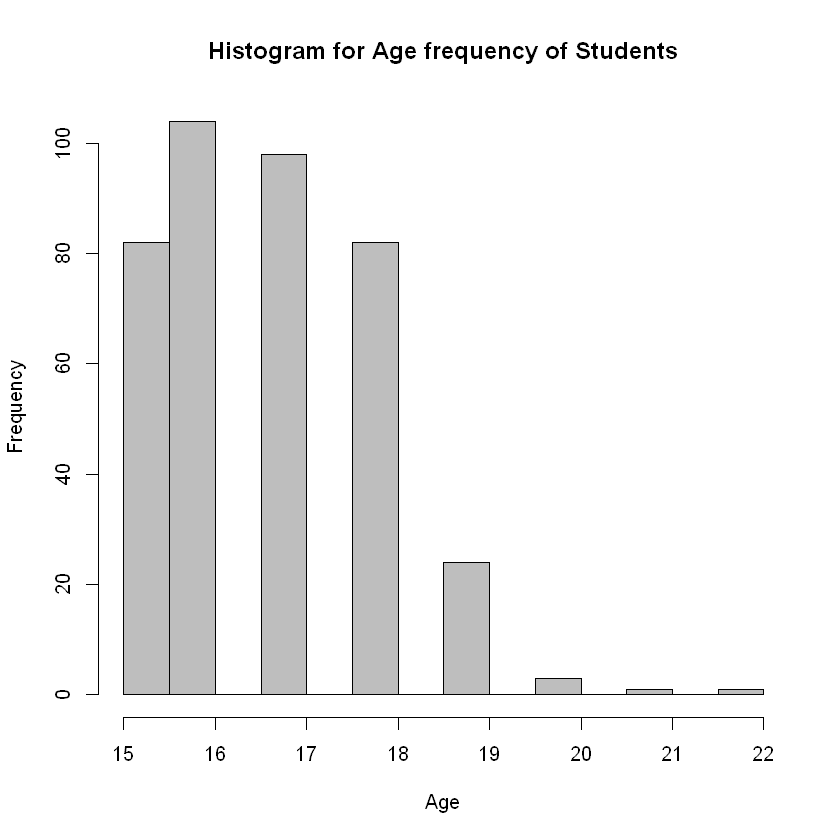

In [4]:
hist(student$age,main="Histogram for Age frequency of Students", 
     xlab="Age", 
     border="Black", 
     col="Gray")

shows histogram of the age of students and the frequency of each age 

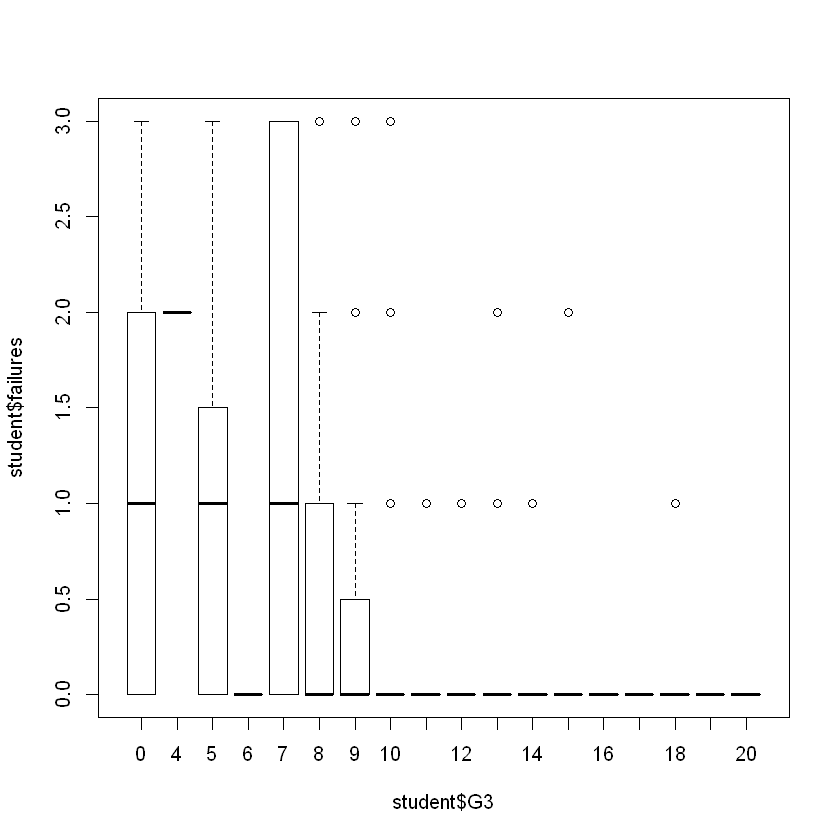

In [5]:
boxplot(student$failures ~ student$G3, data=student) # G3 is the final grade
newdata <- subset(student,  G3 %in%c(17:20),   #if u want the range will be put itin in
                  select=c(G3, sex))

In [8]:
cor(student$G3, student$failures)

[1] -0.3604149

The boxplot and the negative value of correlation smeans there is an inverse relationship between two variables(failures and final grade) when one variable decreases, the other increases

We can draw the relations also based on gender

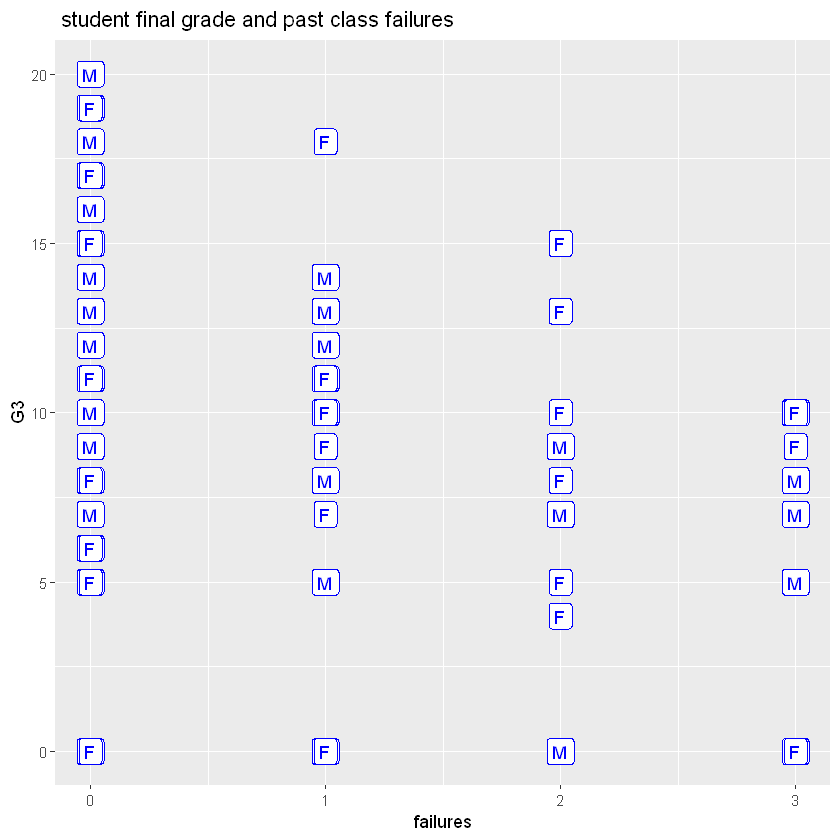

In [11]:
student %>% ggplot(aes(x = failures, y =G3, label=sex
)) +
  geom_label(color="blue")+

ggtitle(" student final grade and past class failures")

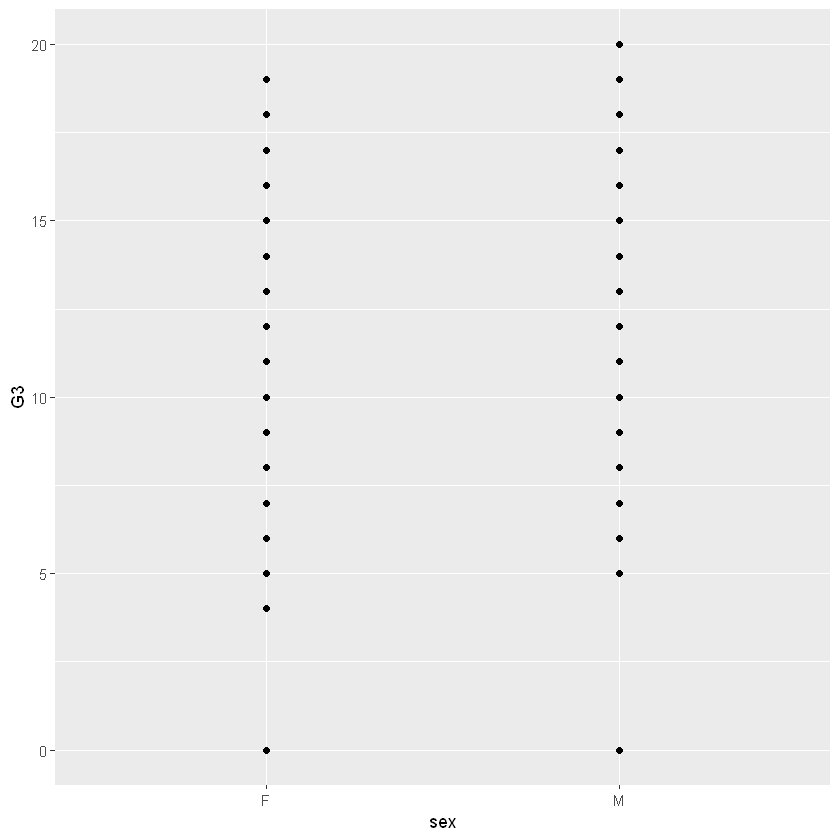

In [12]:
student %>% ggplot(aes(x = sex, y =G3
)) +
 geom_point()

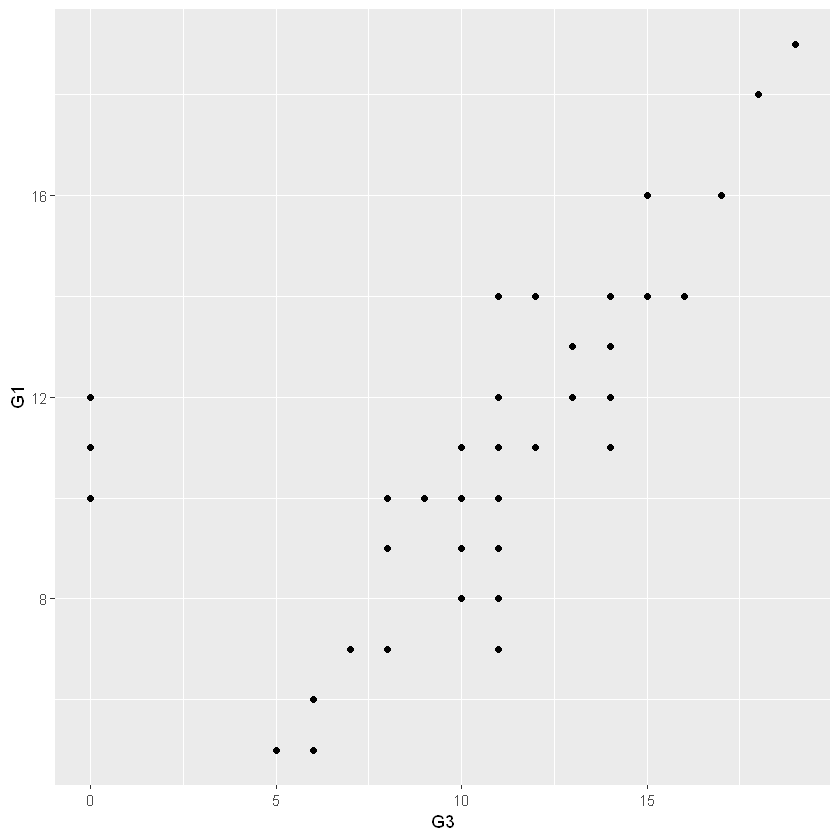

In [13]:
 student %>% filter( Fedu == "4" & sex == "F") %>%
  ggplot(aes( G3, G1 )) +
  geom_point()

Let's see the realtion beteen workday alchol consumption affect student performance and final grade

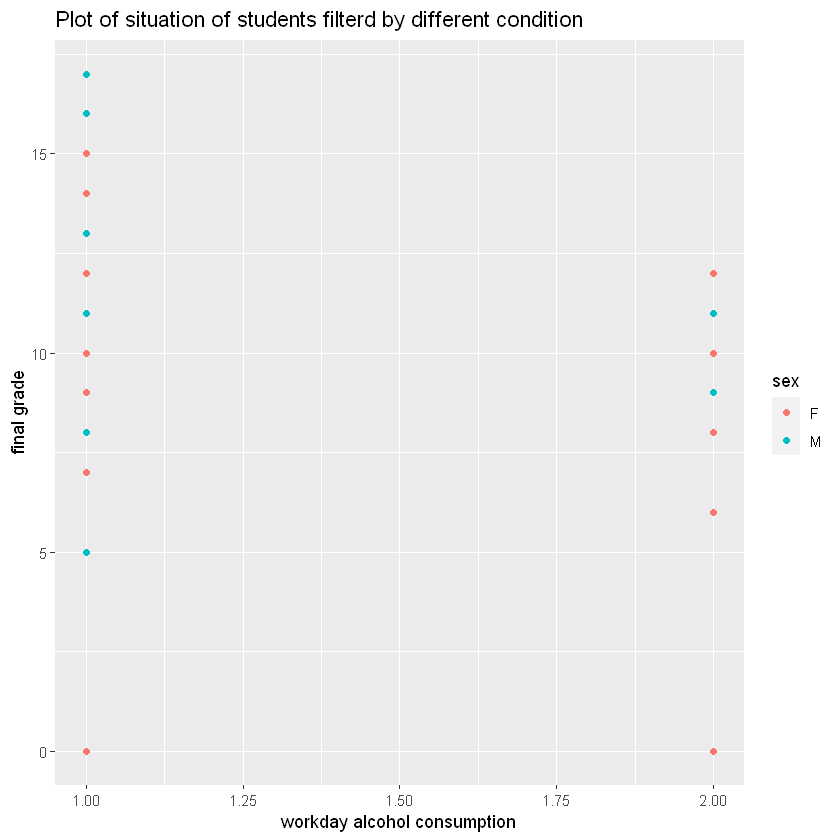

In [14]:
student %>% filter( Pstatus =="T" & famsup =="yes" &
    higher== "yes" & romantic == "yes" & famrel >=4  & Walc<=3) %>% #condition of students
  ggplot(aes(Dalc,G3,color=sex))+geom_point()+ ggtitle("Plot of situation of students filterd by different condition") +  #DAlc is workday alcohol consumption
  xlab("workday alcohol consumption") + ylab("final grade")

In [16]:
cor(student$Dalc, student$G3)

[1] -0.05466004

The plot and the negative value of correlation smeans there is a strong inverse relationship between two variables(failures and final grade) when one variable decreases, the other increases